<a href="https://colab.research.google.com/github/NicoEssi/Machine_Learning_scikit-learn/blob/master/Support_Vector_Regression_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression - Demo


---

Separates data into two classes so that they are maximally apart. Suppose the data is linearly separable; what is the best line, i.e. with greatest margin, to separate them? 

While this may initially look like a classification algorithm (which is true! See the Support Vector Machine demo [here](https://github.com/NicoEssi/Machine_Learning_scikit-learn) for more on the classification implementation), this can also be used to do regression - as will be demonstrated in this jupyter notebook.

![Image taken from Google; originally from DataCamp](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288454/index2_ub1uzd.png)

## Pros

*   Easily adaptable
*   Works very well on non-linear problems
*   Not biased by outliers

## Cons

*   More difficult to understand/explain
*   Feature scaling compulsary

---

## 1. Import dependencies and data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!wget https://github.com/NicoEssi/Machine_Learning_scikit-learn/raw/master/Position_Salaries.csv

## 2. Read CSV and inspect

In [2]:
data = pd.read_csv('Position_Salaries.csv')

X = data.iloc[:, 1:2]
y = data.iloc[:, 2]

data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## 3. Feature scaling

In [0]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.values.reshape(-1,1))

## 4. Initialize and fit the SVR model

In [0]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

## 5. Prediction with the trained model

In [0]:
y_pred = regressor.predict(sc_X.transform(np.array([6.5]).reshape(1,-1)))
y_pred = sc_y.inverse_transform(y_pred)

## 6. Result visualization

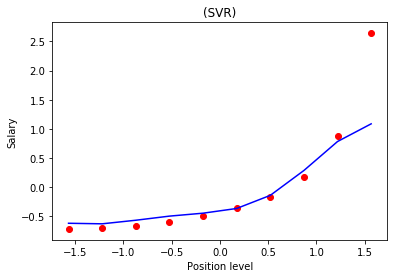

In [8]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('(SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()